In [1]:
#import libraries 
import numpy as np
import pandas as pd

In [2]:
#Load the data
profile_src_json = pd.read_json('/Users/javi/Downloads/TinderProfiles.json')

In [3]:
#create a copy in order to work with it and not to damage our original dataSet
profile_copy = profile_src_json.copy()

In [4]:
#Drop off "__v" column as it has only 0 values
del profile_copy["__v"]

In [5]:
#define the dataframe 
pre_df = profile_copy

In [6]:
pre_df.head(3)

,_id,appOpens,conversations,conversationsMeta,matches,messages,messagesReceived,messagesSent,swipeLikes,swipePasses,swipes,user,userId
0,00b74e27ad1cbb2ded8e907fcc49eaaf,"{'2016-01-02': 26, '2016-01-13': 10, '2016-01-...","[{'match_id': 'Match 739', 'messages': [{'to':...","{'nrOfConversations': 739, 'longestConversatio...","{'2016-01-02': 10, '2016-01-13': 5, '2016-01-1...","{'sent': {'2016-01-02': 11, '2016-01-13': 2, '...","{'2016-01-02': 12, '2016-01-13': 3, '2016-01-1...","{'2016-01-02': 11, '2016-01-13': 2, '2016-01-1...","{'2016-01-02': 50, '2016-01-13': 70, '2016-01-...","{'2016-01-02': 14, '2016-01-13': 93, '2016-01-...","{'likes': {'2016-01-02': 50, '2016-01-13': 70,...","{'birthDate': '1976-01-01T00:00:00.000Z', 'age...",00b74e27ad1cbb2ded8e907fcc49eaaf
1,024610702baf540af5637873cd1534e9,"{'2016-07-12': 20, '2016-07-13': 18, '2016-07-...","[{'match_id': 'Match 464', 'messages': [{'to':...","{'nrOfConversations': 464, 'longestConversatio...","{'2016-07-12': 1, '2016-07-13': 0, '2016-07-14...","{'sent': {'2016-07-12': 0, '2016-07-13': 0, '2...","{'2016-07-12': 0, '2016-07-13': 0, '2016-07-14...","{'2016-07-12': 0, '2016-07-13': 0, '2016-07-14...","{'2016-07-12': 0, '2016-07-13': 221, '2016-07-...","{'2016-07-12': 0, '2016-07-13': 61, '2016-07-1...","{'likes': {'2016-07-12': 0, '2016-07-13': 221,...","{'birthDate': '1997-07-04T00:00:00.000Z', 'age...",024610702baf540af5637873cd1534e9
2,0a5e3dd8489fe67485ddb7d6adb26ebd,"{'2019-07-01': 61, '2019-07-02': 154, '2019-07...","[{'match_id': 'Match 303', 'messages': [{'to':...","{'nrOfConversations': 303, 'longestConversatio...","{'2019-07-01': 13, '2019-07-02': 12, '2019-07-...","{'sent': {'2019-07-01': 12, '2019-07-02': 66, ...","{'2019-07-01': 6, '2019-07-02': 70, '2019-07-0...","{'2019-07-01': 12, '2019-07-02': 66, '2019-07-...","{'2019-07-01': 87, '2019-07-02': 39, '2019-07-...","{'2019-07-01': 30, '2019-07-02': 12, '2019-07-...","{'likes': {'2019-07-01': 87, '2019-07-02': 39,...","{'birthDate': '1998-02-06T00:00:00.000Z', 'age...",0a5e3dd8489fe67485ddb7d6adb26ebd


### Each profile has an ID number which we use to check how many users are in the dataset. We also verify that there aren't any Duplicate Accounts in this dataset before continuing on with our research!

In [7]:
# get the user id to see how many profiles are 
allusersids = []
for uniqueid in pre_df.userId:
    userid = uniqueid[-6:]
    allusersids.append(userid)
print(len(allusersids))

1209


### We want to see how many times each user opened the app in our dataset, and also what their average daily number was.


In [8]:
import sys 
personOpeners = []
for openers in pre_df.appOpens:
    if len(openers) == 0:
        continue
    maxDate = ""
    maxOpens = 0
    minDate = ""
    minOpens = sys.maxsize
    for date in openers:
        if (openers[date] > maxOpens):
            maxOpens = openers[date]
            maxDate = date

        if (openers[date] < minOpens):
            minOpens = openers[date]
            minDate = date

    personOpeners.append(minOpens)
    # append the vals to a list

counter = 0
for j in personOpeners:
    if j >= 1:
        counter += 1 

print(f'there are {counter} people who open the app every day')


there are 290 people who open the app every day


In [9]:
#import the langdetect in order to detect the lenguaje of the message
#We will focus on English, Spanish and Japanese 
from langdetect import detect

### Since the messages are in a JSON structure, we have to take those out in order to do our language classification and run the sentiment analysis

In [17]:
#Take all conversations for each user in a list to add it to our dataFrame 
all_messages=[]
totalNumberMessages = []

for conversation in pre_df.conversations:
    numberMessages = 0
    messages=[]
    for match in conversation:
        for message in match['messages']:
            if 'message' in message.keys():
                if len(message['message']) != 0:
                    try:
                        language = detect(message['message'])
                        messages.append(message['message'] +  ',' + language)
                        numberMessages += 1
                    except:
                        1
        # break
    # messages=messages[:2]
    all_messages.append(messages)
    totalNumberMessages.append(numberMessages)

print(all_messages)

[[], ['Hello again, so now that we matched again, what exactly are you looking for here?,en'], ['It&rsquo;s me, the chicken nuggets,en', 'Exactly what I wanted,en'], ['I&apos;m worried about you. Based on your hiking pole, you&apos;re left handed. All left handed people are witches and witches cast spells. \n\nLet&apos;s just say that I&apos;m concerned that you&apos;ve already cast a spell over me.,en', 'Ahhhh yes, the classic putting the phone in the pocket pose. A classic, just like my old favourite&colon; my head&apos;s tilted because I have a kink in my neck.,en'], [], ['Holaaa Andrea! Igual bonito inicio de semana,it', 'Pues ahí va jaja con mucho trabajo afortunadamente,es'], [], [], [], ['hey,so', 'nice pics ;&rpar;,ca'], [], ['I have to say u have one do the best bios I&rsquo;ve ever seen,en', 'Like where do I start.. 😂,en'], [], ['Hey! What are you up to?,en', 'Not much, just wondering what you&apos;re doing on here at 12 on a Sunday you gotta get some sleep!,en'], ['helloo !,

In [11]:
#import the langdetect in order to detect the lenguaje of the message
#We will focus on English, Spanish and Japanese 
from langdetect import detect

In [14]:
# Save all the conversations in a csv file so we can use it to train the ML model 
# Identify the language of the message with the langdetect module
#have to create a folder 'messages' to run save the conversations 
messages_file = open('tinder_combo.csv','w')
files = {
}
for messages in all_messages:
    for message in messages:
        if len(message) != 0:
            try:
                language = detect(message)
                if language not in files.keys():
                    files[language] = open('messages/' + language +'.csv', 'w', encoding='utf-8')
                files[language].write(repr(message) + '\n')
            except:
                1

for language in files:
    files[language].close()

In [ ]:
# messages_file = open('tinder_combo.csv','w')
# for messages in all_messages:
#     for message in messages:
#         if len(message) != 0:
#             try:
#                 language = detect(message)
#                 messages_file.write(repr(message) + ',' + language + '\n')
#             except:
#                 1
           


# messages_file = open('tinder_combo.csv','w')
# files = {
#     'en': open('en_messages.csv', 'w')
#     'es': open('sp_messages.csv', 'w'),
#     'ja': open('jp_messages.csv', 'w')
# }
# files['en'].write("sep=°\n")
# for messages in all_messages:
#     for message in messages:
#         if len(message) != 0:
#             try:
#                 language = detect(message)
#                 if language not in files.keys():
#                     files[language].write(repr(message) + '\n')
#             except:
#                 1

In [15]:
#Take the conversationsMeta of each user and brake down the dictionary format
""""This is in a total time frame but the other has a len of 100, it that a problem  """ 
totalNrOfConversation=[]
totalLongestConversation=[]
totalLongestConversationInDay=[]
totalNrOfOneMessageConversation=[]


for conversationMeta in pre_df.conversationsMeta:
    totalNrOfConversation.append(conversationMeta['nrOfConversations'])
    totalLongestConversation.append(conversationMeta['longestConversation'])
    totalLongestConversationInDay.append(conversationMeta['longestConversationInDays'])
    totalNrOfOneMessageConversation.append(conversationMeta['nrOfOneMessageConversations'])



totalNrOfConversation 1209
totalLongestConversation 1209
totalLongestConversationInDay 1209
totalNrOfOneMessageConversation 1209


In [23]:
#app matches for each user
all_MatchesDates = []
all_matches = []
#list of numbers, each number is a user 
totalMatches = []

for dfMatches in pre_df.matches:
    matches = []
    matchesDate = []
    #variable name 
    totalMatchesUser = 0
   

    for MatchDate in dfMatches:
        matches.append(dfMatches[MatchDate])
        totalMatchesUser += dfMatches[MatchDate]
        matchesDate.append(MatchDate)    

    all_matches.append(matches)
    all_MatchesDates.append(matchesDate)
    totalMatches.append(totalMatchesUser)


In [45]:
#Take 100 app swipeLikes for each user and check how many times it open the app in a day
# all_swipeLikes = []
# for atraction in pre_df.swipeLikes:
#     matches = []
#     for heart in atraction:
#         matches.append(atraction[heart])
#     all_swipeLikes.append(matches)

In [19]:
#total swipes right per use
totalSwipesRight = [] 
for dfSwipeLikes in pre_df.swipeLikes:
    countSwipesRight = 0
    for swipeRight in dfSwipeLikes:
        countSwipesRight += dfSwipeLikes[swipeRight]
    totalSwipesRight.append(countSwipesRight)

1209

In [22]:
#total swipes left per user
totalSwipesLeft = []
for dfSwipePasses in pre_df.swipePasses:
    countSwipesLeft = 0
    for swipeLeft in dfSwipePasses:
        countSwipesLeft += dfSwipePasses[swipeLeft]
    totalSwipesLeft.append(countSwipesLeft)

1209

In [47]:
#Take 100 app swipePasses for each user and check how many times it open the app in a day
# all_swipePasses = []
# for dislike in pre_df.swipePasses:
#     dislikes = []
#     for left in dislike:
#         dislikes.append(dislike[left])
#     all_swipePasses.append(dislikes)

In [17]:
#import library for know the user age 
from datetime import date
from datetime import datetime

#Take user anonymous data and break down the dictionary format
allBirthDates=[]
allcities = []
allcountreis=[]
allgenders=[]
allinterestedIn=[]

#Users date of birth
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year #- ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

for person in pre_df.user:
    birthdateStr = person['birthDate'][:10]
    birthdate = datetime.strptime(birthdateStr, '%Y-%m-%d')
    userAge = age(birthdate)
    allBirthDates.append(userAge)

#Users city
# for person in pre_df.user:
#     print(person)
#     allcities.append(person['cityName'])

#Users country
counter = 0
for person in pre_df.user:
    if 'country' in person.keys():
        allcountreis.append(person['country'])
    else:
        allcountreis.append('')
        counter += 1
print(counter)
        
        
#Users gender
for person in pre_df.user:
    gender = person['gender']
    allgenders.append(gender)

#Users interest In
for person in pre_df.user:
    for interest in person:
        if interest == 'interestedIn':
            searching = []
            searching.append(person[interest])
    allinterestedIn.append(searching)


479


### CREATE THE DATASET WITH DATA WE HAVE CLEANED

In [56]:
#We insert the unique user id
df = pd.DataFrame(allusersids,columns=['user_id'])
df.head(3)

,user_id
0,49eaaf
1,1534e9
2,b26ebd


In [57]:
#check if there is user with Null value in their id
pd.isnull(df.loc[1, 'user_id'])

False

In [58]:
#Merge app_opens data with df
df['app_opens']=all_opens

In [59]:
#check if there is user with Null value in app_opens colum
pd.isnull('app_opens')

False

In [61]:
#Merge all_messages data with df
df['all_messages']=all_messages

In [ ]:
#check if the list messages has any conversations 
empity = df['all_messages'].str.len()!=0
print(empity)

In [64]:
#check if there is user with 0 value in app_opens colum
count = (df['number_conversations'] == 0).sum()
print('The number of empty conversations are: ', count)

The number of empty number_conversations are:  29


In [66]:
#check if there is user with 0 time conversation
zero_time = (df['longest_conver'] == 0).sum()
print('The number with 0 time conversations are: ', zero_time)

The number with 0 time conversations are:  33


In [68]:
#check if there is user with 0 time conversation insde the logset Conversation day column
zero_time_day = (df['longest_conver_day'] == 0).sum()
print('The number with 0 time conversations in day are: ', zero_time_day)

The number with 0 time conversations in day are:  52


In [70]:
#check if there is user with 0 messages Conversation day column
messages_conver = (df['num_messages_conver'] == 0).sum()
print('The number with 0 time conversations in day are: ', messages_conver)

The number with 0 time conversations in day are:  82


In [108]:
#Merge number_conversations data with df
df['number_conversations']= totalNrOfConversation

#Merge longest_conver data with df
df['longest_conver']=totalLongestConversation

#Merge longest_conver_day data with df
df['longest_conver_day']=totalLongestConversationInDay

#Merge num_messages_conver data with df
df['num_messages_conver']=totalNrOfOneMessageConversation

#Merge all_matchesDates data with df
df['all_matchesDates']=all_MatchesDates

#Merge all_matches data with df
df['all_matches']=all_matches

#Merge all_BirthDates data with df
df['all_BirthDates']= allBirthDates

#Merge all_Cities data with df
df['all_Cities']= allcities

#Merge all_genders data with df
df['all_genders']= allgenders

#Merge all_interestedIn data with df
df['all_interestedIn']= allinterestedIn

In [29]:
#Counter how many males 
countM = 0
for user in pre_df.user:
    if user['gender'] == 'M':
        countM += 1

The total number of males in the dataset is: 1058


In [30]:
#Counter how many males 
countF = 0
for user in pre_df.user:
    if user['gender'] == 'F':
        countF += 1
print(f'The total number of males in the dataset is: {countF}')

The total number of males in the dataset is: 150


In [33]:
#Counter people who are interested in 'M'
counterM = 0
for user in pre_df.user:
    if user["interestedIn"] == "M":
        counterM += 1
print(f"The number of people interested in 'M' are:  {counterM}")

The number of people interested in 'M' are:  134


In [34]:
#Counter people who are interested in 'F'
counterF = 0
for user in pre_df.user:
    if user["interestedIn"] == "F":
        counterF += 1
print(f"The number of people interested in 'F' are:  {counterF}")

The number of people interested in 'F' are:  1017


In [35]:
#Counter people who are interested in 'M and F'
counterBi = 0
for user in pre_df.user:
    if user["interestedIn"] != "F" and user["interestedIn"] != "M":
        counterBi += 1
print(f"The number of people interested in 'M and F' are:  {counterBi}")

The number of people interested in 'M and F' are:  58


In [109]:
df.head(3)

,user_id,app_opens,opens_date,all_messages,number_conversations,longest_conver,longest_conver_day,num_messages_conver,all_matchesDates,all_matches,all_swipeLikes,all_swipePasses,all_BirthDates,all_genders
0,49eaaf,[24],[2017-12-30],[],739,133,683.557442,226,"[((2016-01-02, 10), (2016-01-13, 5), (2016-01-...","[10, 5, 9, 8, 6, 13, 4, 14, 2, 12, 2, 8, 2, 4,...","[50, 70, 21, 5, 29, 92, 27, 77, 84, 76, 82, 93...","[14, 93, 75, 96, 71, 38, 76, 56, 21, 49, 41, 2...",[1976-01-01],M
1,1534e9,[6],[2020-02-20],"[Hello again, so now that we matched again, wh...",464,36,622.466528,56,"[((2016-07-12, 1), (2016-07-13, 0), (2016-07-1...","[1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 221, 108, 215, 110, 215, 118, 115, 116, 4,...","[0, 61, 19, 90, 23, 54, 40, 42, 29, 0, 42, 23,...",[1997-07-04],M
2,b26ebd,[2],[2020-05-13],"[It&rsquo;s me, the chicken nuggets, Exactly w...",303,33,295.283414,106,"[((2019-07-01, 13), (2019-07-02, 12), (2019-07...","[13, 12, 23, 15, 9, 5, 2, 1, 0, 3, 0, 0, 1, 1,...","[87, 39, 122, 67, 35, 14, 26, 98, 46, 99, 15, ...","[30, 12, 48, 26, 18, 10, 19, 55, 19, 99, 12, 4...",[1998-02-06],M


# INSIGHTS 

## APP OPENERS 
% of people who open the app every day 

In [36]:
print(f'there are {counter} people who open the app every day')

there are 290 people who open the app every day


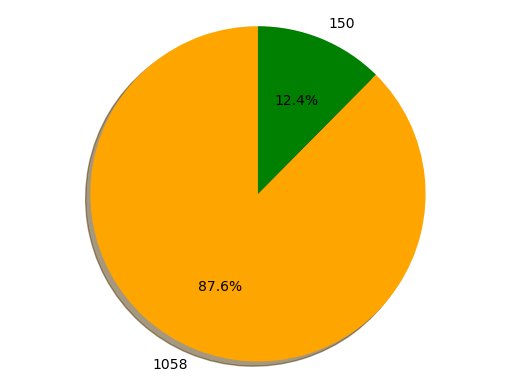

In [31]:
import matplotlib.pyplot as plt
#pie graph 
data = countM, countF
colors = ['orange', 'green']
highlight =(0,0)
plt.pie(list(data), explode=highlight, labels=data, colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## MATCHES 

In [ ]:
#HOW TO EXTRACT VALUES FROM LOCAL VARIABLES 

#total swipe right swipeLikes per user  [HOW TO GET THE TOTAL DF]
totalSwipesRight

#total swipe left swipePasses per user 
totalSwipesLeft

#the variable is in the local scope thay is why is printing 0 
totalMatches

# #total number of messages sent to all matches per user 
totalNumberMessages

## Age

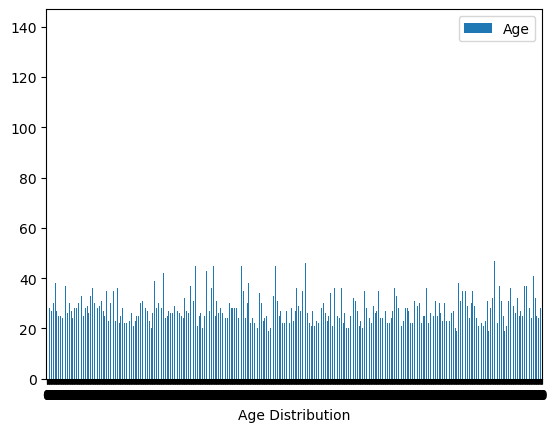

In [33]:
import matplotlib
#dataset age distribution 
allBirthDates


graph1 = pd.DataFrame({'Age Distribution':0, 'Age':allBirthDates})
ax = graph1.plot.bar(x='Age Distribution', y='Age', rot=0)


## Diversity

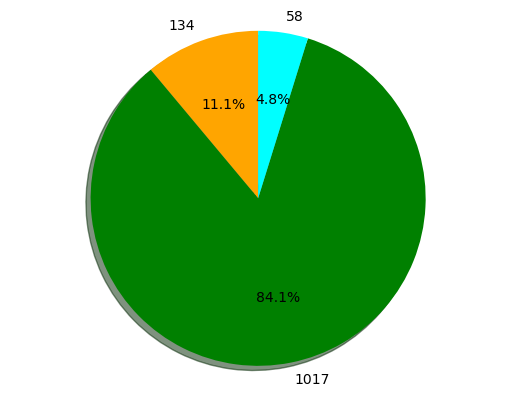

In [36]:
#pie graph 
data = counterM, counterF, counterBi
colors = ['orange', 'green', 'cyan']
highlight =(0,0,0)
plt.pie(list(data), explode=highlight, labels=data, colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
#HOW WE CAN CREATE THIS MAP 
#Countries involved in the research 

fig = px.choropleth(df, locations = 'country', locationmode = 'country names', animation_frame='year',
                    hover_data=['income', 'educ_idx'],
                    color='educ_idx', 
                    color_continuous_scale=['rgb(255,255,255)', 'rgb(171, 216, 240)', 'rgb(25, 132, 197)'],
                    height = 600,
                    title = """education rate with country income""")
fig.show()

In [ ]:
#What most people talk about (main topics)

unemploment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

assumptions 
① 1 means they open the app every single day 
the amount of openers is recorded every single day, (the date is inconcistency)